In [74]:
import pandas as pd
import numpy as np

In [75]:
my_dict = {'A':[1,1,0],
        'B':[2,0,1],
        'C':[0,1,5],
        'D':[4,1,None]}

In [76]:
df = pd.DataFrame.from_dict(data=my_dict, orient='index', columns=['P1', 'P2', 'P3'])

In [77]:
df.head()

,P1,P2,P3
A,1,1,0.0
B,2,0,1.0
C,0,1,5.0
D,4,1,NaN


In [78]:
df['P3'].fillna(np.mean(df['P3'].dropna()))

A    0.0
B    1.0
C    5.0
D    2.0
Name: P3, dtype: float64

In [79]:
df['P3'].fillna(np.median(df['P3'].dropna()))

A    0.0
B    1.0
C    5.0
D    1.0
Name: P3, dtype: float64

Метрики

In [80]:
P1 = [0, 1, 2]
P2 = [2, 1, 0]
evklid_metric = sum([((x - y)**2) for x, y in zip(P1, P2)])**0.5
manh_metric = sum([abs(x - y) for x, y in zip(P1, P2)])
max_metric = max([abs(x - y) for x, y in zip(P1, P2)])
print(f'Метрика Евклида: {evklid_metric}\nМетрика Манхэттен: {manh_metric}\nМакс-метрика: {max_metric}')

Метрика Евклида: 2.8284271247461903
Метрика Манхэттен: 4
Макс-метрика: 2


Нормализация

In [81]:
P = (1,0,5,2,2)
min_max_normalization = [(x - min(P)) / (max(P) - min(P)) for x in P]
print(min_max_normalization)

[0.2, 0.0, 1.0, 0.4, 0.4]


In [82]:
P = [1,0,5,2,2]
n = ((np.array(P) - min(P))/(max(P) - min(P)))
print(n)

[0.2 0.  1.  0.4 0.4]


In [83]:
from sklearn.preprocessing import MinMaxScaler

a = np.array([1, 0, 5, 2, 2]).reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit_transform(a)

array([[0.2],
       [0. ],
       [1. ],
       [0.4],
       [0.4]])

In [84]:
# P = (1,0,5,2,2)
# P_mean = np.mean(P)
# P_n = len(P)
# P_std = (sum([((x - P_mean)**2) for x in P]) / P_n) ** 0.5
# min_std_normalization = [(x - P_mean) / P_std for x in P]
# min_std_normalization

In [85]:
P = (1,0,5,2,2)
n = (np.array(P) - np.mean(P)) / np.std(P)
n

array([-0.5976143 , -1.19522861,  1.79284291,  0.        ,  0.        ])

In [86]:
from sklearn.preprocessing import StandardScaler

a = np.array([1, 0, 5, 2, 2]).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit_transform(a)

array([[-0.5976143 ],
       [-1.19522861],
       [ 1.79284291],
       [ 0.        ],
       [ 0.        ]])

Заполнение пропущенного значения по метрике Манхэттен 

In [87]:
import pandas as pd
from sklearn.metrics.pairwise import manhattan_distances

my_dict = {'Vasia': [5, 5, 5, 3],
           'Petia': [5, 3, 4, 4],
           'Masha': [2, 5, 3, 5],
           'Sasha': [3, 4, 4, None]}

df = pd.DataFrame.from_dict(data=my_dict, orient='index', columns=['Silence', 'Titanic', 'Matrix', 'Harry'])

md = manhattan_distances(df.iloc[0:3, 0:3], [df.iloc[3, 0:3]]).reshape(3)
norm_mul = 1 / ((1 / md)).sum()
sim = ((df.iloc[0:3, 3]/md)).sum()
print(norm_mul*sim)

4.090909090909092


In [88]:
df

,Silence,Titanic,Matrix,Harry
Vasia,5,5,5,3.0
Petia,5,3,4,4.0
Masha,2,5,3,5.0
Sasha,3,4,4,NaN


In [89]:
df.loc[['Vasia'],['Silence', 'Titanic',	'Matrix']]

,Silence,Titanic,Matrix
Vasia,5,5,5


In [90]:
a = np.abs(df.loc['Vasia',['Silence', 'Titanic', 'Matrix']] - df.loc[['Sasha'],['Silence', 'Titanic', 'Matrix']]).sum(axis=1).sum()
b = np.abs(df.loc['Petia',['Silence', 'Titanic', 'Matrix']] - df.loc[['Sasha'],['Silence', 'Titanic', 'Matrix']]).sum(axis=1).sum()
c = np.abs(df.loc['Masha',['Silence', 'Titanic', 'Matrix']] - df.loc[['Sasha'],['Silence', 'Titanic', 'Matrix']]).sum(axis=1).sum()
print(a,b,c)

(1 / ((1 / a) + (1 / b) + (1/c))) * \
((df.loc['Vasia','Harry'] / a) + \
(df.loc['Petia','Harry'] / b) + \
(df.loc['Masha','Harry'] / c))

4.0 3.0 3.0


4.090909090909092

In [91]:
A = [1,0,1,0,1,0]
C = [1,1,0,1,1,0]
evklid_metric = sum([(x-y)**2 for x, y in zip(A,C)])**0.5
evklid_metric

1.7320508075688772

In [92]:
from scipy.spatial.distance import euclidean

A = (1, 0, 1, 0, 1, 0)
C = (1, 1, 0, 1, 1, 0)

print(round(euclidean(A, C), 2))

1.73


Выбросы

In [93]:
q_25, q_75 = 2, 4
p = [8, -1.5, 7.5, 0, 3, 6.5, 0.5]

p_min = q_25 - 1.5 * (q_75 - q_25)
p_max = q_75 + 1.5 * (q_75 - q_25)

p = filter(lambda x: x < p_min or x > p_max, p)
print(list(p))

[8, -1.5, 7.5]


In [94]:
mean, std, median, n = 10, 1.1, 9, 10

P = [13.5, 14, 7, 6, 6.5, 13]

(mean - median) <= 3*std / np.sqrt(n)

for i in P:
    if (mean - 3*std) < i < (mean + 3*std):
        print(i, end=' ')
print()

def is_outliers(P) -> list:
    if (mean - median) <= 3*std / np.sqrt(n):
        return list(filter(lambda x: (mean - 3*std) < x < (mean + 3*std), P))
    list(filter(lambda x: (mean - 5*std) < x < (mean + 5*std), P))

result = is_outliers(P)
print(*result)

7 13 
7 13


In [95]:
df = pd.DataFrame.from_dict({'A': [1, 1, 0], 'B': [0, 2, -1], 'C': [2, 3, 1], 'D': [1, 0, 4]}, orient='index', columns=['P1', 'P2', 'P3'])
df

,P1,P2,P3
A,1,1,0
B,0,2,-1
C,2,3,1
D,1,0,4


In [96]:
for i in df.index:
    print(list(df.loc[i]))
    globals()['x_' + str(i)] = list(df.loc[i])

[1, 1, 0]
[0, 2, -1]
[2, 3, 1]
[1, 0, 4]


In [97]:
def manhet(list1, list2, list3, list4):
    s = 0
    for a, b, c, d in zip(list1, list2, list3, list4):
        s += abs(a - b) + abs(a - c) + abs(a - d)
    return s

In [98]:
print('A:', manhet(x_A, x_B, x_C, x_D))
print('B:', manhet(x_B, x_C, x_D, x_A))
print('C:', manhet(x_C, x_D, x_A, x_B))
print('D:', manhet(x_D, x_A, x_B, x_C))

A: 12
B: 16
C: 16
D: 20


In [99]:
data = np.array([[1, 1, 0], [0, 2, -1], [2, 3, 1], [1, 0, 4]])
df = pd.DataFrame(data, columns=('P1', 'P2', 'P3'), index=('A', 'B', 'C', 'D'))
metric_dict = {}
for idx, row in df.iterrows():
    res = (abs(df - df.loc[idx]).sum()).sum()
    metric_dict[idx] = res
k = sorted(metric_dict, key=metric_dict.__getitem__)[-1]
print(k, metric_dict[k])

D 20


In [100]:
df

,P1,P2,P3
A,1,1,0
B,0,2,-1
C,2,3,1
D,1,0,4


In [101]:
a = [0, 3, 4, 4, 1] 
b = [3, 0, 1 ,2, 5]
c = [4, 1, 0, 3, 3]
d = [3, 2, 3, 0, 4]
e = [1, 5, 3, 4, 0]

def dist(a, b):
    return sum(np.abs(np.array(a) - np.array(b)))**0.5 

print('a - b:', dist(a, b))
print('a - c:', dist(a, c))
print('a - d:', dist(a, d))
print('a - e:', dist(a, e))

a - b: 3.872983346207417
a - c: 3.605551275463989
a - d: 3.4641016151377544
a - e: 2.23606797749979


Набор объектов A,B,C,D,E,F,G планируется разбить на 3 кластера. Для этого был применен графовый алгоритм и было построено остовное дерево минимального веса, состоящее из ребер AE, BD, CD, DF, ED, EG. Длины ребер соответственно равны 1, 2, 4, 1, 3, 2. Какие объекты попадут в один кластер с объектом A?

In [102]:
import networkx as nx

G = nx.Graph() # Создаем граф и добавляем ребра
edges = [("A", "E", 1), ("B", "D", 2), ("C", "D", 4), ("D", "F", 1), ("E", "D", 3), ("E", "G", 2)]
G.add_weighted_edges_from(edges)

G.remove_edge("C", "D")
G.remove_edge("E", "D")

cluster_with_A = list(nx.node_connected_component(G, "A"))
cluster_with_A


['A', 'G', 'E']

In [103]:
features = np.array([[1, 1, 0], [0, 2, -1], [2, 3, 1], [1, 0, 4]])
print(features.mean(axis=0))

[1.  1.5 1. ]


Какие объекты попадают в окружность с центром (1,2) и радиусом 2,5   (используется max-метрика)?

In [104]:
#инициализация исходных данных
data = pd.DataFrame({'Object':['A','B','C','D','E'],'P1':[4,3,1,-1,0],'P2':[2,2,-1,1,4]})
data

,Object,P1,P2
0,A,4,2
1,B,3,2
2,C,1,-1
3,D,-1,1
4,E,0,4


In [105]:
data['R'] = data[['P1','P2']].apply(lambda x: max(abs(x[0]-1),abs(x[1]-2)),axis=1)
data['isOk'] = data['R'] < 2.5
data

,Object,P1,P2,R,isOk
0,A,4,2,3,False
1,B,3,2,2,True
2,C,1,-1,3,False
3,D,-1,1,2,True
4,E,0,4,2,True


In [106]:
#найдем какие точки ближе к (2,3), а какие к (1,1)
data.drop(['R','isOk'], axis=1, inplace=True)
data['K'] = data[['P1','P2']].apply(lambda x: 1 if (abs(x[0]-2)+abs(x[1]-3))<=(abs(x[0]-1)+abs(x[1]-1)) else 2,axis=1)
data

,Object,P1,P2,K
0,A,4,2,1
1,B,3,2,1
2,C,1,-1,2
3,D,-1,1,2
4,E,0,4,1


In [107]:
df = pd.DataFrame(np.array([[4,2],[3,2],[1,-1],[-1,1],[0,4]]),
                   columns=['P1', 'P2'], index=['A', 'B', 'C', 'D', 'E'])
df.index[((df.P1 - 1).abs() <= 2.5) & ((df.P2 - 2).abs() <= 2.5)]

Index(['B', 'D', 'E'], dtype='object')

In [108]:
df

,P1,P2
A,4,2
B,3,2
C,1,-1
D,-1,1
E,0,4


MAE MAPE

In [109]:
Y = [1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
Y_ = [0, 2, 2, 5, 3, -1, -1, -4, -6, -5]
n = len(Y)
MAE = sum([abs(y - y_) for y, y_ in zip(Y, Y_)]) / n
MAPE = sum([abs((y - y_) / (y)) for y, y_ in zip(Y, Y_)]) / n *100
MAE, MAPE

(0.9, 33.166666666666664)

In [110]:
y = np.array([1,2,3,4,5,-1,-2,-3,-4,-5])
a = np.array([0,2,2,5,3,-1,-1,-4,-6,-5])
MAE = sum(abs(y - a))/len(y)
MAPE = sum((abs((y - a)/y)))/len(y)*100
MAE, MAPE

(0.9, 33.166666666666664)

In [111]:
import sklearn
MAE = sklearn.metrics.mean_absolute_error([1,2,3,4,5,-1,-2,-3,-4,-5], [0,2,2,5,3,-1,-1,-4,-6,-5])
MAPE = sklearn.metrics.mean_absolute_percentage_error([1,2,3,4,5,-1,-2,-3,-4,-5], [0,2,2,5,3,-1,-1,-4,-6,-5])
MAE, MAPE

(0.9, 0.33166666666666667)

Коэффициенты модели линейной регрессии

In [112]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 3])
A = np.vstack([x, np.ones(len(x))]).T
w1, w0 = np.linalg.lstsq(A, y, rcond=None)[0]
w1, w0

(0.7999999999999997, -0.19999999999999904)

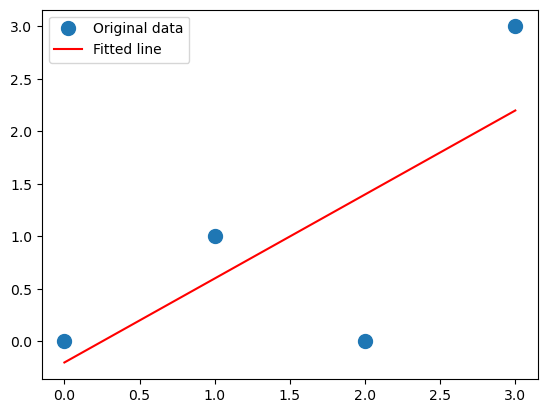

In [113]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, w1*x + w0, 'r', label='Fitted line')
plt.legend()
plt.show()

In [114]:
from sympy import *
w1, w0 = symbols('w1 w0')
expr = sum((w1 * i + w0 - j)**2 for i, j in zip(x,y))
a = diff(expr, w0)
b = diff(expr, w1)
result = linsolve([a, b], (w1, w0))
print('Частная производная от w0', a)
print('Частная производная от w1', b)
print('Решение системы уравнений', result)

Частная производная от w0 8*w0 + 12*w1 - 8
Частная производная от w1 12*w0 + 28*w1 - 20
Решение системы уравнений {(4/5, -1/5)}


In [115]:
x, y = symbols('x, y')
expr = 2 * x**2 - 3 * x * y + 4 * y**2 - 2 * x + y + 10
diff(expr, x)

4*x - 3*y - 2

In [116]:
x1 = np.array([0, 1, 2, 3])
x2 = np.array([3, 2, 1, 0])
y = np.array([0, 1, 0, 3])
C = 1
w1, w2, w0 = symbols('w1 w2 w0')
expr = sum((w1 * i + w2 * k + w0 - j)**2 + (w1**2 + w2**2 + w0 **2) for i, k, j in zip(x1, x2 ,y))
a = diff(expr, w1)
b = diff(expr, w2)
c = diff(expr, w0)
result = linsolve([a, b, c], (w1, w2, w0))
print('Частная производная от w1', a)
print('Частная производная от w2', b)
print('Частная производная от w0', c)
print('Решение системы уравнений', result)

Частная производная от w1 12*w0 + 36*w1 + 8*w2 - 20
Частная производная от w2 12*w0 + 8*w1 + 36*w2 - 4
Частная производная от w0 16*w0 + 12*w1 + 12*w2 - 8
Решение системы уравнений {(47/91, -5/91, 2/13)}


In [117]:
a = list(map(lambda x: round(x, 2), [47/91, -5/91, 2/13]))
a

[0.52, -0.05, 0.15]

In [118]:
from sklearn.linear_model import Ridge

C=1.0

X = np.array( [ [0,3], [1,2], [2,1], [3,0] ] )
y = np.array( [ 0, 1, 0, 3 ] )

#expand X by 1.0 column

X = np.insert(X, 0, values=1, axis=1 )

model = Ridge(alpha=C, fit_intercept=False )
model.fit(X, y )

print("coef:", model.coef_);

coef: [ 0.17391304  0.62450593 -0.1027668 ]


In [119]:
tn, fn, fp, tp = 25, 20, 10, 15

A = (tn + tp)/(tn + tp + fn + fp)
P = tp/(tp + fp)
R = tp/(tp + fn)

print("%0.2f" % A, "%0.2f" % P, "%0.2f" % R)

0.57 0.60 0.43


In [120]:
g = np.array([[25, 20],
              [10, 15]])
accuracy = np.sum(np.diag(g))/np.sum(g)
print(np.around(accuracy, 2))
precision = np.diag(g)[-1]/np.sum(g[-1])
print(np.around(precision, 2))
recall = np.diag(g)[-1]/sum(g)[-1]
print(np.around(recall, 2))

0.57
0.6
0.43


In [121]:
g = np.array([[0, 0],
              [20, 30]])

accuracy = sum(np.diag(g)) / np.sum(g)
persicion = np.diag(g)[-1] / np.sum(g[-1])
recall = np.diag(g)[-1] / sum(g)[-1]
accuracy, persicion, recall

(0.6, 0.6, 1.0)

In [122]:
x1 = [-1, 1, 2, -3, 3, 0]
x2 = [0, 2, -2, -1, 2, 0]
y = [1, 0, 0, 1, 1, None]
df = pd.DataFrame(list(zip(x1,x2,y)), columns=['X1', 'X2', 'Y'], index=['A', 'B', 'C', 'D', 'E', 'F'])
df

,X1,X2,Y
A,-1,0,1.0
B,1,2,0.0
C,2,-2,0.0
D,-3,-1,1.0
E,3,2,1.0
F,0,0,NaN


In [123]:
metric_dict = {}
for idx, row in df.iterrows():
    res = (abs(df - df.loc[idx]).sum()).sum()
    metric_dict[idx] = res
metric_dict

{'A': 21.0, 'B': 24.0, 'C': 28.0, 'D': 31.0, 'E': 29.0, 'F': 17.0}

In [124]:
from sklearn.neighbors import KNeighborsClassifier
X = np.array([[-1, 0],[1, 2],[2, -2],[-3, -1], [3, 2]])
y = np.array([1, 0, 0, 1, 1])

k = [3,5]
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)
    print(model.predict([[0, 0]]),f'k={i}')

[0] k=3
[1] k=5


In [125]:
X = np.array([[-1, 0], [1, 2], [2, -2], [-3, -1], [3, 2]])
y = np.array([1, 0, 0, 1, 1])

def predict(x, k):
    distances = ((X - x)**2).sum(axis=1) # Найти расстояния от предсказываемого до тренеровочных объектов.
    labels = y[distances.argsort()[:k]]  # Расстояния отсортировать по возрастанию и взять первые k-меток.
    print(distances)
    print(labels)
    return np.bincount(labels).argmax()  # Вернуть самую частотную метку.

for k in (3, 5):
    y_pred = predict(np.array([0, 0]), k)
    print(f'При k = {k} объект будет отнесен к классу {y_pred}.')

[ 1  5  8 10 13]
[1 0 0]
При k = 3 объект будет отнесен к классу 0.
[ 1  5  8 10 13]
[1 0 0 1 1]
При k = 5 объект будет отнесен к классу 1.


In [126]:
df = pd.DataFrame({'P1': [4, 3, 1, -1, 0], 'P2': [2, 2, -1, 1, 4]}, index=list('ABCDE'))
df

,P1,P2
A,4,2
B,3,2
C,1,-1
D,-1,1
E,0,4


In [127]:
df['R'] = df[['P1','P2']].apply(lambda x: (abs(x[0]-2 + x[1] - 3) > abs(x[0]-1 + x[1] - 1)), axis=1)
df

,P1,P2,R
A,4,2,False
B,3,2,False
C,1,-1,True
D,-1,1,True
E,0,4,False


In [128]:
df

,P1,P2,R
A,4,2,False
B,3,2,False
C,1,-1,True
D,-1,1,True
E,0,4,False


In [129]:
from functools import partial
def Gini(x, y):
    def Pr(px, py=None):
        if py is None:
            return x.count(px) / len(x)
        lv = [y[i] for i in range(len(x)) if x[i] == px]
        if len(lv) != 0:
            return lv.count(py) / len(lv)
        else:
            return 0
    return Pr(0) * Pr(0, 0) * Pr(0, 1) + Pr(1) * Pr(1, 0) * Pr(1, 1)
p1 = [0, 0, 1, 1, 0]
p2 = [1, 1, 1, 1, 1]
p3 = [0, 0, 0, 1, 1]
y = [1, 1, 1, 0, 0]
G = partial(Gini, y=y)
for x, p in zip([G(p1), G(p2), G(p3)], ['p1', 'p2', 'p3']):
    print('{} = {:.2f}'.format(p, x))

p1 = 0.23
p2 = 0.24
p3 = 0.00


In [130]:
X = np.array([[0, 1, 0], [0, 1, 0], [1, 1, 0], [1, 1, 1], [0, 1, 1]])
y = np.array([1, 1, 1, 0, 0])

def gini_impurity(x, y):
    gini = lambda y: y.mean() * (1 - y.mean()) if y.size > 0 else 0 
    return x.mean() * gini(y[x==1]) + (1 - x.mean()) * gini(y[x==0])

for x in X.T:
    print(gini_impurity(x, y).round(2))

0.23
0.24
0.0
